In [1]:
%matplotlib inline


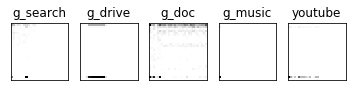

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# %matplotlib inline

DEBUG = False
def load_data(t):
    images = np.load(f"/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistUpTrimAndTps/X_trim_and_tps_{t}sec.npy")
    shape = images.shape
    data = images.reshape((shape[0],shape[1]*shape[2]))
    return data
    
def load_target(t):
    return np.load(f"/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistUpTrimAndTps/y_trim_and_tps_{t}sec.npy")

images = np.load("/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/BiFlowMnistTrimAndTps/X_trim_and_tps_60sec.npy")
target = np.load("/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/BiFlowMnistTrimAndTps/y_trim_and_tps_60sec.npy")



shape = images.shape

data = images.reshape((shape[0],shape[1]*shape[2]))


if DEBUG == True:
    from sklearn.datasets import load_digits
    digits = load_digits()
    print("digits.data.shape", digits.data.shape)
    print("data.shape", data.shape)
    print("-----------")
    print("digits.images.shape", digits.images.shape)
    print("images.shape", images.shape)
    print("-----------")
    print("digits.target.shape", digits.target.shape)
    print("target.shape", target.shape)
    print("-----------")

index_to_label = {0: 'g_search', 1: 'g_drive', 2: 'g_doc', 3: 'g_music', 4: 'youtube'}

nrows, ncols = 1, 5
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    img_idx = target.tolist().index(i)
    ax.imshow(images[img_idx, ...], cmap=plt.get_cmap('binary'))
    plt.xticks([]);
    plt.yticks([])
    plt.title(index_to_label[target[img_idx]])
plt.show('digits-generated.png')


In [2]:
import seaborn as sns
import matplotlib.patheffects as PathEffects

def scatter_2d(x, y):
    palette = np.array(sns.color_palette("hls",len(np.unique(y))))
#     label=np.array([index_to_label[i] for i in RANGE])[y.astype(np.int)]

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], s=40, c=palette[y.astype(np.int)])
    ax.axis('tight')


    # We add the labels for each class.
    txts = []
    for i in range(len(np.unique(y))):
        # Position of each label.
        xtext, ytext = np.median(x[y == i, :], axis=0)
        txt = ax.text(xtext, ytext, index_to_label[i], fontsize=18, bbox=dict(facecolor=palette[i], alpha=0.8))
        txts.append(txt)

    return f, ax, sc, txts


g_search: 1960
g_drive: 1682
g_doc: 1266
g_music: 637
youtube: 1127
1
3
5
15
30
60


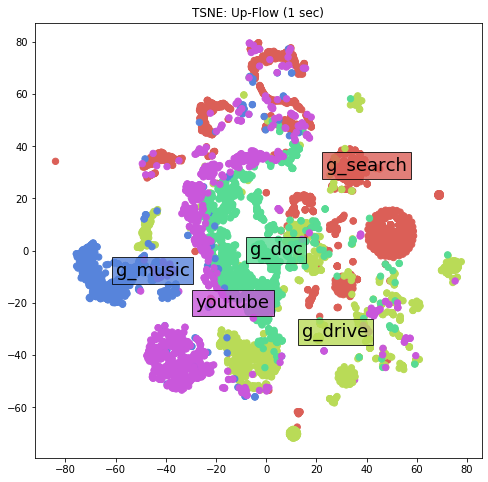

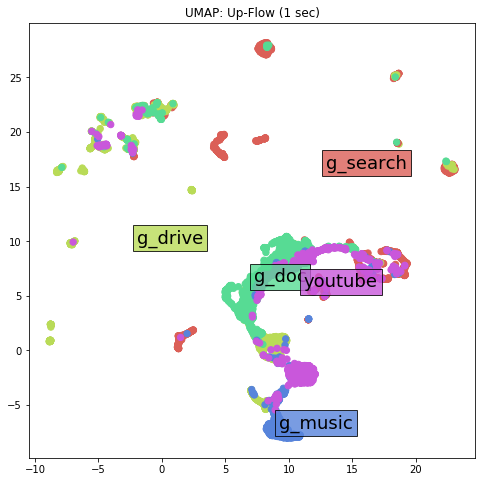

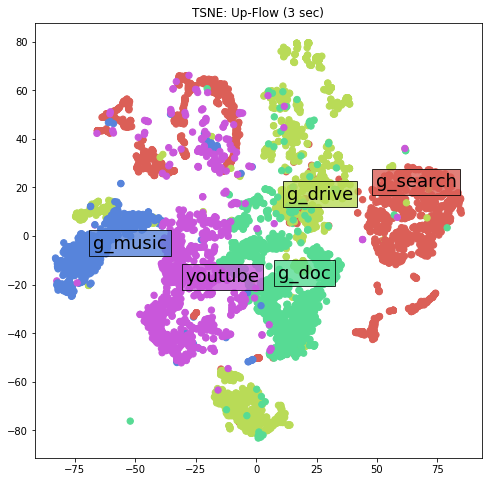

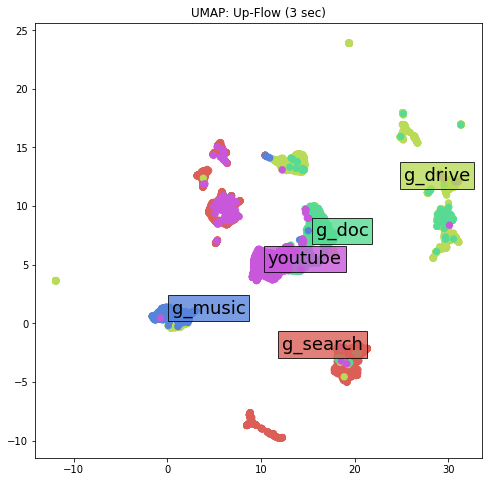

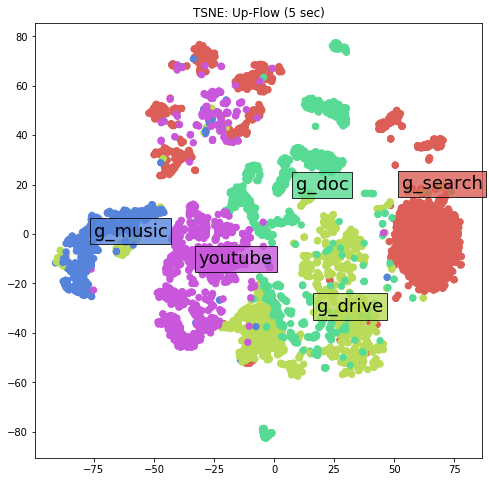

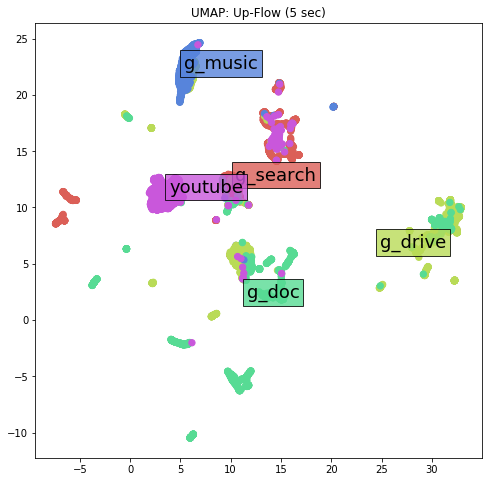

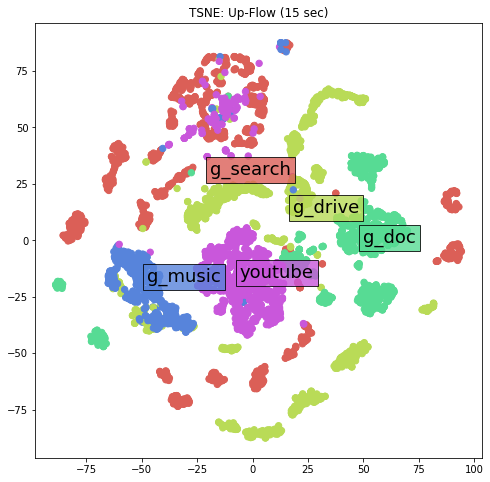

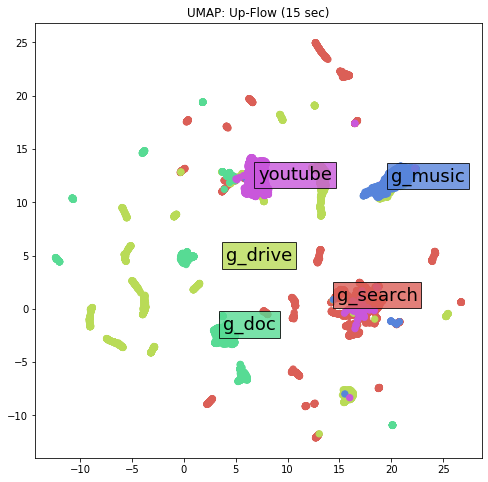

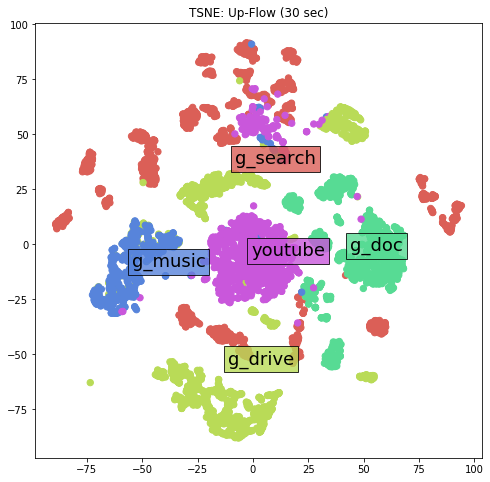

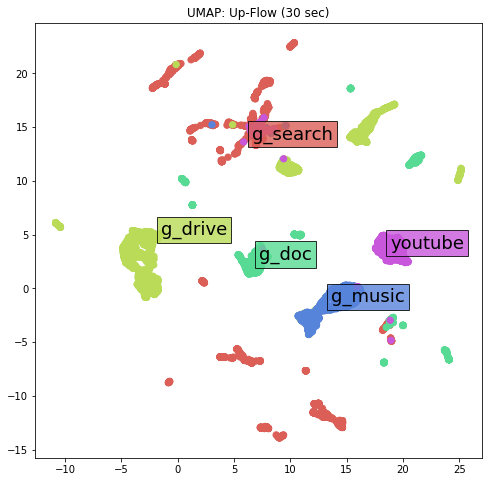

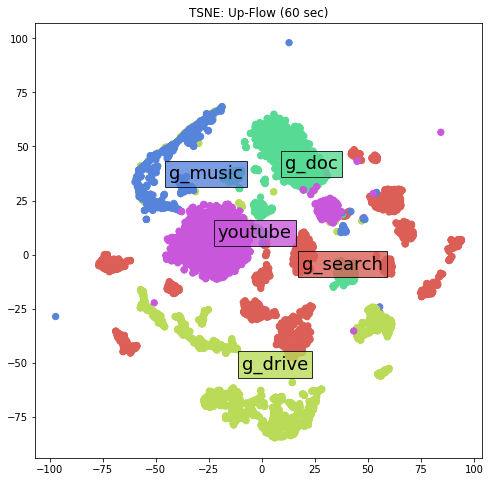

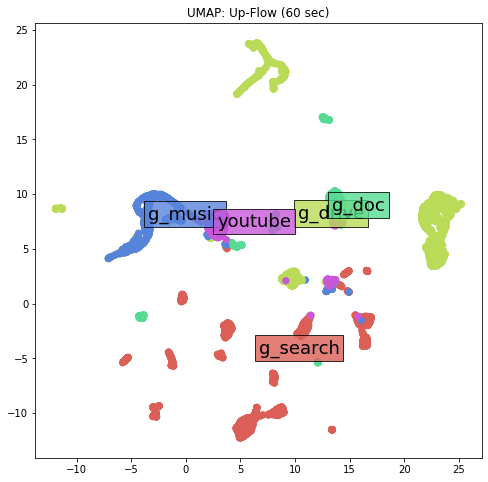

In [3]:
RS = 20150101
import umap
reducer = umap.UMAP()


RANGE = range(len(np.unique(target)))
for i in RANGE:
    print(f"{index_to_label[i]}: {data[target == i].shape[0]}")

for t in [1,3,5,15,30,60]:
    print(t)
    data = load_data(t)
    target = load_target(t)
    
    
    tsne_projection = TSNE(random_state=RS).fit_transform(data)
    f, ax, sc, txts = scatter_2d(tsne_projection, target)
    ax.title.set_text(f"TSNE: Up-Flow ({t} sec)")
    
    umap_projection = reducer.fit_transform(data)
    f, ax, sc, txts = scatter_2d(umap_projection, target)
    ax.title.set_text(f"UMAP: Up-Flow ({t} sec)")
    plt.show()
    

/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistDownTrimAndTps/X_trim_and_tps_60sec.npy
/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistDownTrimAndTps/y_trim_and_tps_60sec.npy


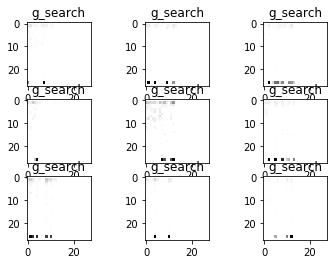

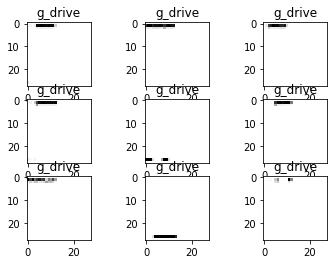

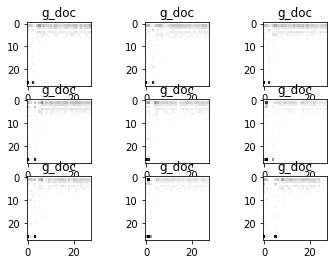

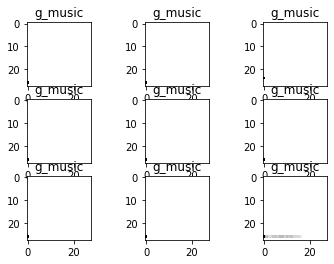

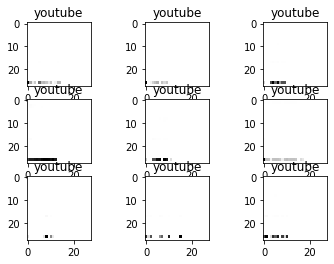

/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistUpTrimAndTps/X_trim_and_tps_60sec.npy
/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistUpTrimAndTps/y_trim_and_tps_60sec.npy


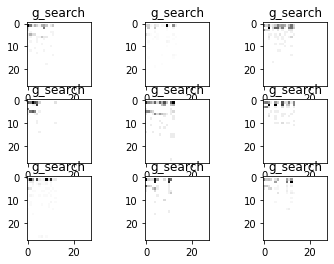

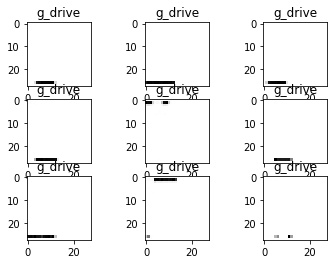

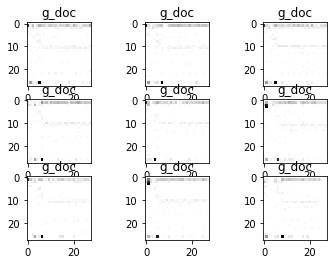

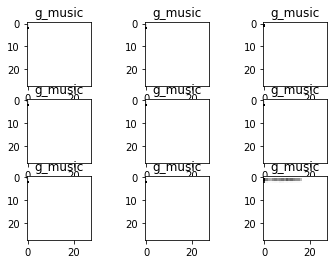

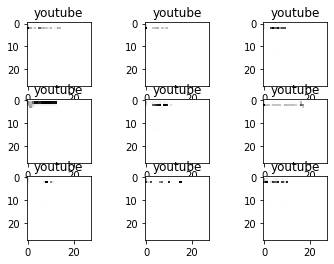

/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/BiFlowMnistTrimAndTps/X_trim_and_tps_60sec.npy
/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/BiFlowMnistTrimAndTps/y_trim_and_tps_60sec.npy


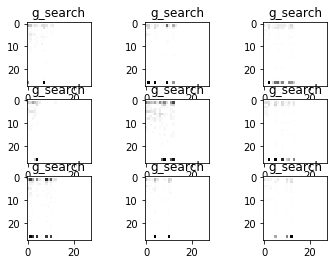

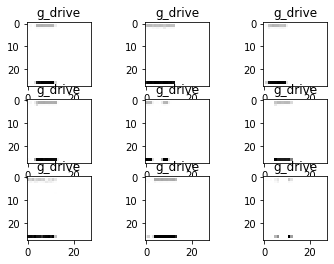

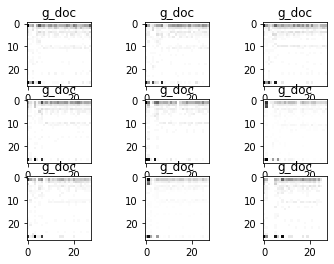

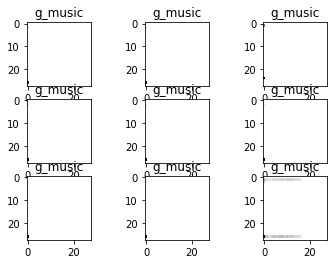

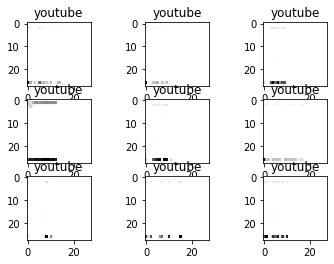

/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistDownTrimAndTps/X_trim_and_tps_30sec.npy
/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistDownTrimAndTps/y_trim_and_tps_30sec.npy


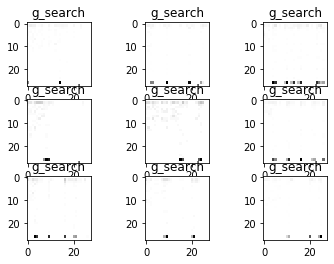

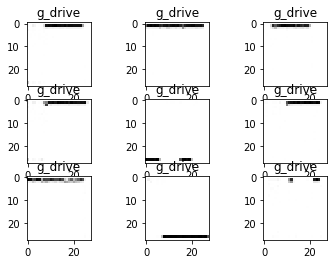

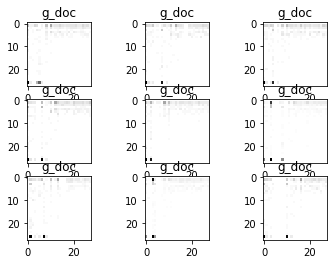

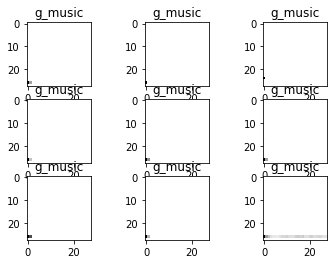

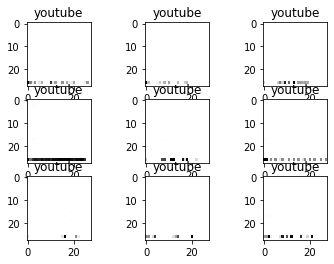

/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistUpTrimAndTps/X_trim_and_tps_30sec.npy
/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy/FlowMnistUpTrimAndTps/y_trim_and_tps_30sec.npy


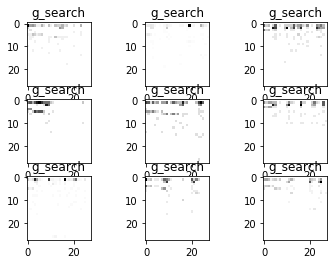

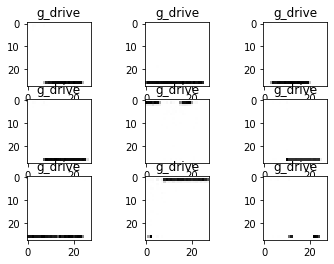

KeyboardInterrupt: 

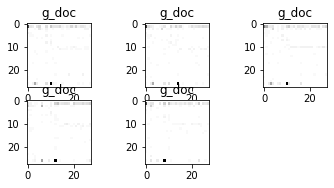

In [4]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot


def plot_npy(X, y, t, direction):
    label_to_index_dict = {'search': 0, 'drive': 1, 'doc': 2, 'music': 3, 'youtube': 4}
    index_to_label = {0: 'g_search', 1: 'g_drive', 2: 'g_doc', 3: 'g_music', 4: 'youtube'}

    for choose_y in range(5):
        pyplot.figure()
        for plt_i, i in enumerate(list(np.argwhere(y == choose_y))[:9]):
            i = i[0]
            label = index_to_label[y[i]]
            # define subplot
            ax = pyplot.subplot(330 + 1 + plt_i)
            # plot raw pixel data
            ax.imshow(X[i], cmap=pyplot.get_cmap('binary'))
            ax.title.set_text(label)
            dir_path = Path(f"plots/{direction}/{t}")
            dir_path.mkdir(parents=True, exist_ok=True)
            pyplot.savefig(dir_path / f"{label}")
            # show the figure
        pyplot.show()


for duration_cut in [60, 30, 15, 10]:
    for x_file_path in Path("/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_npy").rglob(f"X*_{duration_cut}*npy"):
        try:
            y_file_path = str(x_file_path).replace("X_", "y_")
            print(x_file_path)
            print(y_file_path)
            parent_parent = x_file_path.parent.parent.name
            parent = x_file_path.parent.name
            file_name = x_file_path.name
            direction = "Up" if parent.startswith("FlowMnistUp") else None
            direction = "Down" if parent.startswith("FlowMnistDown") else direction
            direction = "BiFlow" if parent.startswith("BiFlow") else direction

            X = np.load(x_file_path)
            y = np.load(y_file_path)
            plot_npy(X, y, duration_cut, direction)
        except Exception as e:
            print(e)


(1797, 64)


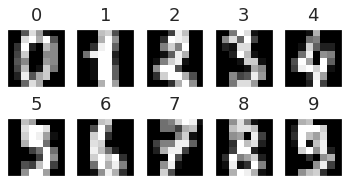

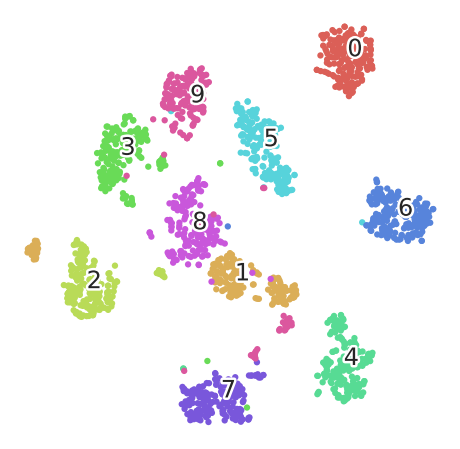

In [5]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
# from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
# from moviepy.video.io.bindings import mplfig_to_npimage
# import moviepy.editor as mpy

digits = load_digits()
print(digits.data.shape)

nrows, ncols = 2, 5
plt.figure(figsize=(6, 3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i, ...])
    plt.xticks([]);
    plt.yticks([])
    plt.title(digits.target[i])
plt.show('digits-generated.png')

# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target == i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target == i]
               for i in range(10)])

digits_proj = TSNE(random_state=RS).fit_transform(X)


def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


scatter(digits_proj, y)
plt.show('digits_tsne-generated.png')
